In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 64.7 MB/s 
     |████████████████████████████████| 1.2 MB 49.6 MB/s 
     |████████████████████████████████| 2.8 MB 68.9 MB/s 
     |████████████████████████████████| 981 kB 46.4 MB/s 
     |████████████████████████████████| 468 kB 44.6 MB/s 
     |████████████████████████████████| 263 kB 39.5 MB/s 
     |████████████████████████████████| 22.3 MB 2.3 MB/s 
     |████████████████████████████████| 3.3 MB 32.6 MB/s 
     |████████████████████████████████| 880 kB 50.6 MB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
     |████████████████████████████████| 101 kB 8.2 MB/s 
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=f5be2ca385fcbce9bb82961dc21b1e0eb0eb96abb9c6ac37490773b4fbe1706c
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b0

In [ ]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 728 kB/s 
     |████████████████████████████████| 175 kB 7.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=729783ed837870785d109174a7ac08ed099cab6087058a4f0feba45ab9be228b
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read the csv file
import pandas as pd
df = pd.read_csv ("/gdrive/MyDrive/CSWorkshop/IMDB Dataset.csv", header = 0)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import string
import re
from cleantext import clean

import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

import nltk
# nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
import pandas as pd
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# this is a good dataset for setiment classification
# however the data is still messy so we should fi that with cleatext first

In [ ]:
cleaned_df = []

for i in df["review"]:
  i = clean(i, no_urls=True, replace_with_url="", no_digits=True, replace_with_digit="", fix_unicode=True, lower=True)
  cleaned_df.append(i)

In [ ]:
cleaned_df[:2]

["one of the other reviewers has mentioned that after watching just oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fac

In [ ]:
def remove_html_markup(s):
    tag = False
    quote = False
    out = ""

    for c in s:
            if c == '<' and not quote:
                tag = True
            elif c == '>' and not quote:
                tag = False
            elif (c == '"' or c == "'") and tag:
                quote = not quote
            elif not tag:
                out = out + c

    return out

In [ ]:
cleaned_df2 = []

for i, _ in enumerate(cleaned_df):
    cleanedtemp = remove_html_markup(cleaned_df[i])
    cleaned_df2.append(cleanedtemp)
  
cleaned_df2[0]

"one of the other reviewers has mentioned that after watching just oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows woul

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
finalText= []
for i in cleaned_df2:
    tokens = word_tokenize(i)
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in sw]
    s = " "
    temp = s.join(words)
    finalText.append(temp)

In [ ]:
df["cleaned"] = finalText
df['sentiment'] = df['sentiment'].astype('str')
df['sentiment'][df['sentiment']=='positive'] = 1
df['sentiment'][df['sentiment']=='negative'] = 0

df.head()

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [ ]:
df['sentiment'] = df['sentiment'].astype('category') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   review     50000 non-null  object  
 1   sentiment  50000 non-null  category
 2   cleaned    50000 non-null  object  
dtypes: category(1), object(2)
memory usage: 830.3+ KB


In [ ]:
df['sentiment'].value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

In [ ]:
from random import sample
sample(range(0,50000),10)

[24408, 27466, 15141, 28528, 12937, 3773, 44658, 29409, 14593, 30099]

In [ ]:
randomsampleSet = sample(range(0,50000),1000)
x = df["cleaned"].values[randomsampleSet]
y = df["sentiment"].astype('str').values[randomsampleSet]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
y

array(['1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0',
       '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1',
       '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1',
       '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0

In [ ]:
x = df["cleaned"].values
# y = df["sentiment"].values
y = df["sentiment"].astype('str').values

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
# use distilBERT transformer
MODEL_NAME = 'distilbert-base-uncased-distilled-squad'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=[0,1])

In [ ]:
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)

preprocessing train...
language: en
train sequence lengths:
	mean : 117
	95percentile : 291
	99percentile : 401


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 110
	95percentile : 289
	99percentile : 429


In [ ]:
# trn.x
trn.x[0]
# trn.x[0].shape
# row 1 of the array is the word, second is the sentiment 1 or 0

array([[ 101, 3849, 2412, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
   9/3500 [..............................] - ETA: 27:25:32 - loss: 0.6992 - accuracy: 0.4667

In [ ]:
learner.fit_onecycle(3e-5, 5)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/5
70/70 [==============================] - 2319s 33s/step - loss: 0.6898 - accuracy: 0.5371 - val_loss: 0.6715 - val_accuracy: 0.5233
Epoch 2/5
 3/70 [>.............................] - ETA: 31:06 - loss: 0.6269 - accuracy: 0.6333

KeyboardInterrupt: ignored

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.save('myModel')

In [ ]:
testRandom = sample(range(0,50000),100)
testSet = list(df["cleaned"][testRandom])
actuals = df['sentiment'].astype('str').values[testRandom]
predictions = predictor.predict(testSet)

myTestSet = pd.DataFrame({'Data': testSet, 'Actual': actuals, 'Predictions': predictions})
pd.crosstab(myTestSet["Actual"],myTestSet["Predictions"])

Predictions,0,1
Actual,,
0,57,4
1,35,4


## Reload a saved model

In [ ]:
# import pickle
# from tensorflow.keras.models import load_model
# # loading preprocess and model file
# features = pickle.load(open('/content/myModel/tf_model.preproc',
#                             'rb'))
# new_model = load_model('/content/myModel/tf_model.h5')
# labels = [0, 1]

# text = 'one of the other reviewers has mentioned that after watching just oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.'
# preproc_text = features.preprocess([text])
# result = new_model.predict(preproc_text)

In [ ]:
predictor = ktrain.load_predictor('myModel')

prediction = predictor.predict(testSet[10])
print(prediction)

0


In [ ]:
randomsampleSet = sample(range(0,50000),10)

predictions = predictor.predict(df["cleaned"].values[randomsampleSet])
prediction_proba = predictor.predict_proba(df["cleaned"].values[randomsampleSet])[:,1]

output = pd.DataFrame({'Text': df["cleaned"].values[randomsampleSet], 'Actual': df["sentiment"].values[randomsampleSet], 'Proba':prediction_proba,  'Predictions':predictions })

output

,Text,Actual,Proba,Predictions
0,great movie would compare movie game get end f...,1,0.403435,0
1,liked movie part say anyone else besides bill ...,1,0.394647,0
2,beautifully filmed movie questions future indi...,1,0.508542,1
3,nightscream tv movie bound pretty dire especia...,0,0.415085,0
4,movie development people growing people fading...,1,0.499843,0
5,barely three half years scraping month run oct...,1,0.513999,1
6,enjoy show last episode true talent melissa jo...,1,0.498563,0
7,beautiful film cleverly shot eye warera detail...,1,0.503829,1
8,really loved although reading reviews quite di...,1,0.397933,0
9,nt much say movie could wonderful tourdeforce ...,0,0.374366,0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


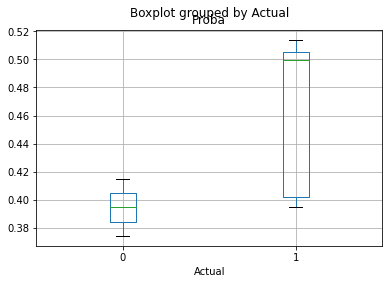

In [ ]:
output.boxplot('Proba', 'Actual')

In [ ]:
# randomsampleSet = sample(range(0,50000),10)

predictions = predictor.predict(df["review"].values[randomsampleSet])
prediction_proba = predictor.predict_proba(df["cleaned"].values[randomsampleSet])[:,1]

output2 = pd.DataFrame({'Text': df["cleaned"].values[randomsampleSet], 'Actual': df["sentiment"].values[randomsampleSet], 'Proba':prediction_proba,  'Predictions':predictions })

output2

,Text,Actual,Proba,Predictions
0,great movie would compare movie game get end f...,1,0.403435,0
1,liked movie part say anyone else besides bill ...,1,0.394647,0
2,beautifully filmed movie questions future indi...,1,0.508542,0
3,nightscream tv movie bound pretty dire especia...,0,0.415085,0
4,movie development people growing people fading...,1,0.499843,0
5,barely three half years scraping month run oct...,1,0.513999,0
6,enjoy show last episode true talent melissa jo...,1,0.498563,0
7,beautiful film cleverly shot eye warera detail...,1,0.503829,0
8,really loved although reading reviews quite di...,1,0.397933,0
9,nt much say movie could wonderful tourdeforce ...,0,0.374366,0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


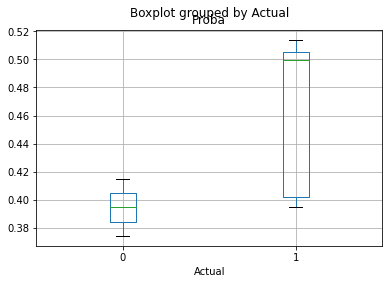

In [ ]:
output2.boxplot('Proba', 'Actual')